In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
fashion_mnist_data = keras.datasets.fashion_mnist

In [ ]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist_data.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
train_images[0].shape

(28, 28)

In [ ]:
train_images = train_images.reshape(len(train_images),28,28,1)
test_images = test_images.reshape(len(test_images),28,28,1)

In [ ]:
train_images[0].shape

(28, 28, 1)

In [ ]:
from keras.engine.training import optimizer
def build_model(hp):
    model = keras.Sequential(
        [
            keras.layers.Conv2D(
                filters = hp.Int('conv_1_filter',min_value=32,max_value=128,step=16),
                kernel_size = hp.Choice('conv_1_kernel', values = [3,5]),
                activation = 'relu',
                input_shape = (28,28,1)
            ),
            keras.layers.Conv2D(
                filters = hp.Int('conv_2_filter',min_value=32,max_value=64,step=16),
                kernel_size = hp.Choice('conv_2_kernel', values = [3,5]),
                activation = 'relu',
            ),
            keras.layers.Flatten(),
            keras.layers.Dense(
                units = hp.Int('dense_1_units',min_value=32,max_value=128,step=16),
                activation = 'relu'
         ),
            keras.layers.Dense(10,activation='softmax')
         
        ]
    )

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-3])),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

    return model


In [ ]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [ ]:
tunner_search =  RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='output',project_name='Mnist Fashion')

In [ ]:
tunner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

Trial 5 Complete [00h 00m 28s]
val_accuracy: 0.9086666703224182

Best val_accuracy So Far: 0.9086666703224182
Total elapsed time: 00h 03m 03s


In [ ]:
model = tunner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 96)        2496      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        27680     
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                                 
 dense (Dense)               (None, 128)               1982592   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,014,058
Trainable params: 2,014,058
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(train_images,train_labels,epochs=10,validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0282 - accuracy: 0.9899 - val_loss: 0.5311 - val_accuracy: 0.9097
Epoch 5/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0255 - accuracy: 0.9914 - val_loss: 0.6154 - val_accuracy: 0.9085
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0256 - accuracy: 0.9914 - val_loss: 0.6269 - val_accuracy: 0.9080
Epoch 7/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0218 - accuracy: 0.9924 - val_loss: 0.6588 - val_accuracy: 0.9073
Epoch 8/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0204 - accuracy: 0.9930 - val_loss: 0.6644 - val_accuracy: 0.9098
Epoch 9/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0199 - accuracy: 0.9930 - val_loss: 0.6688 - val_accuracy: 0.9067
Epoch 10/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0168 - accuracy: 0.9938 - val_loss: 0.7020 - val_accurac

In [ ]:
hist.history

{'loss': [0.028193844482302666,
  0.025467492640018463,
  0.025624487549066544,
  0.021777475252747536,
  0.0203570444136858,
  0.01990676112473011,
  0.016833242028951645],
 'accuracy': [0.9899444580078125,
  0.9913889169692993,
  0.99144446849823,
  0.992388904094696,
  0.9930185079574585,
  0.9929999709129333,
  0.993759274482727],
 'val_loss': [0.5310768485069275,
  0.6153972148895264,
  0.626894474029541,
  0.6588225364685059,
  0.6644212007522583,
  0.6688163876533508,
  0.7020035982131958],
 'val_accuracy': [0.9096666574478149,
  0.9085000157356262,
  0.9079999923706055,
  0.9073333144187927,
  0.9098333120346069,
  0.9066666960716248,
  0.9083333611488342]}

In [ ]:
import matplotlib.pyplot as plt

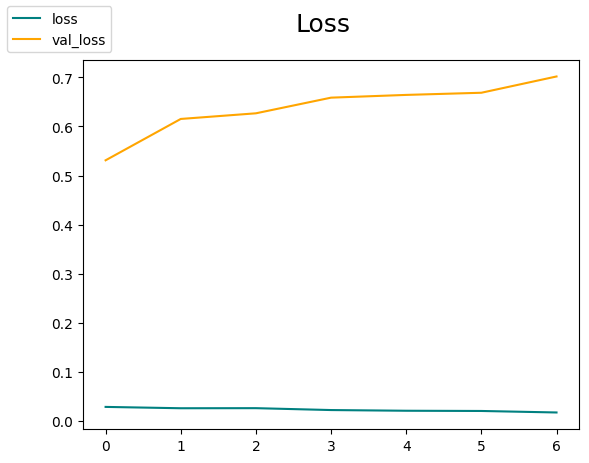

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss',fontsize=18)
fig.legend(loc='upper left')
plt.show()

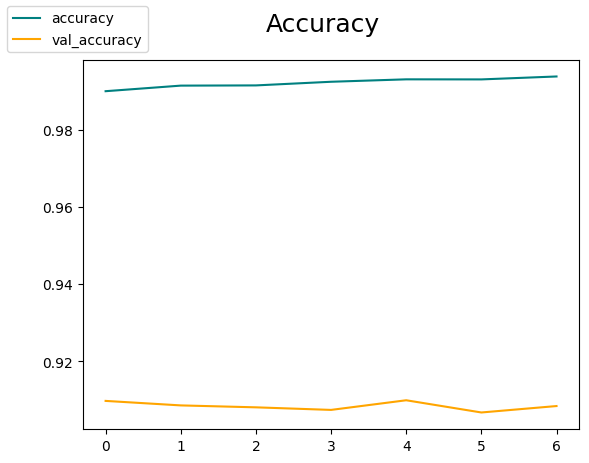

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy',fontsize=18)
fig.legend(loc='upper left')
plt.show()